# Notebook to perfrom Preprocessing 

**Developed by** : Srivalli Kolla

**Würzburg Institute for Systems Immunology - JMU-Würzburg**

**Created on** : April 08, 2024

**Modified on** : April 08,2024

# Importing packages

In [8]:
import anndata as ad
import scanpy as sc
import seaborn as sns

# Setting up environment

In [9]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor="white")

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


# Importing data

In [10]:
vascular = ad.read_h5ad('../Data/hca_heart_vascular_raw.h5ad')
vascular

AnnData object with n_obs × n_vars = 195395 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

# Quality check

## Number of genes

/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/Users/srivalli/conda/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


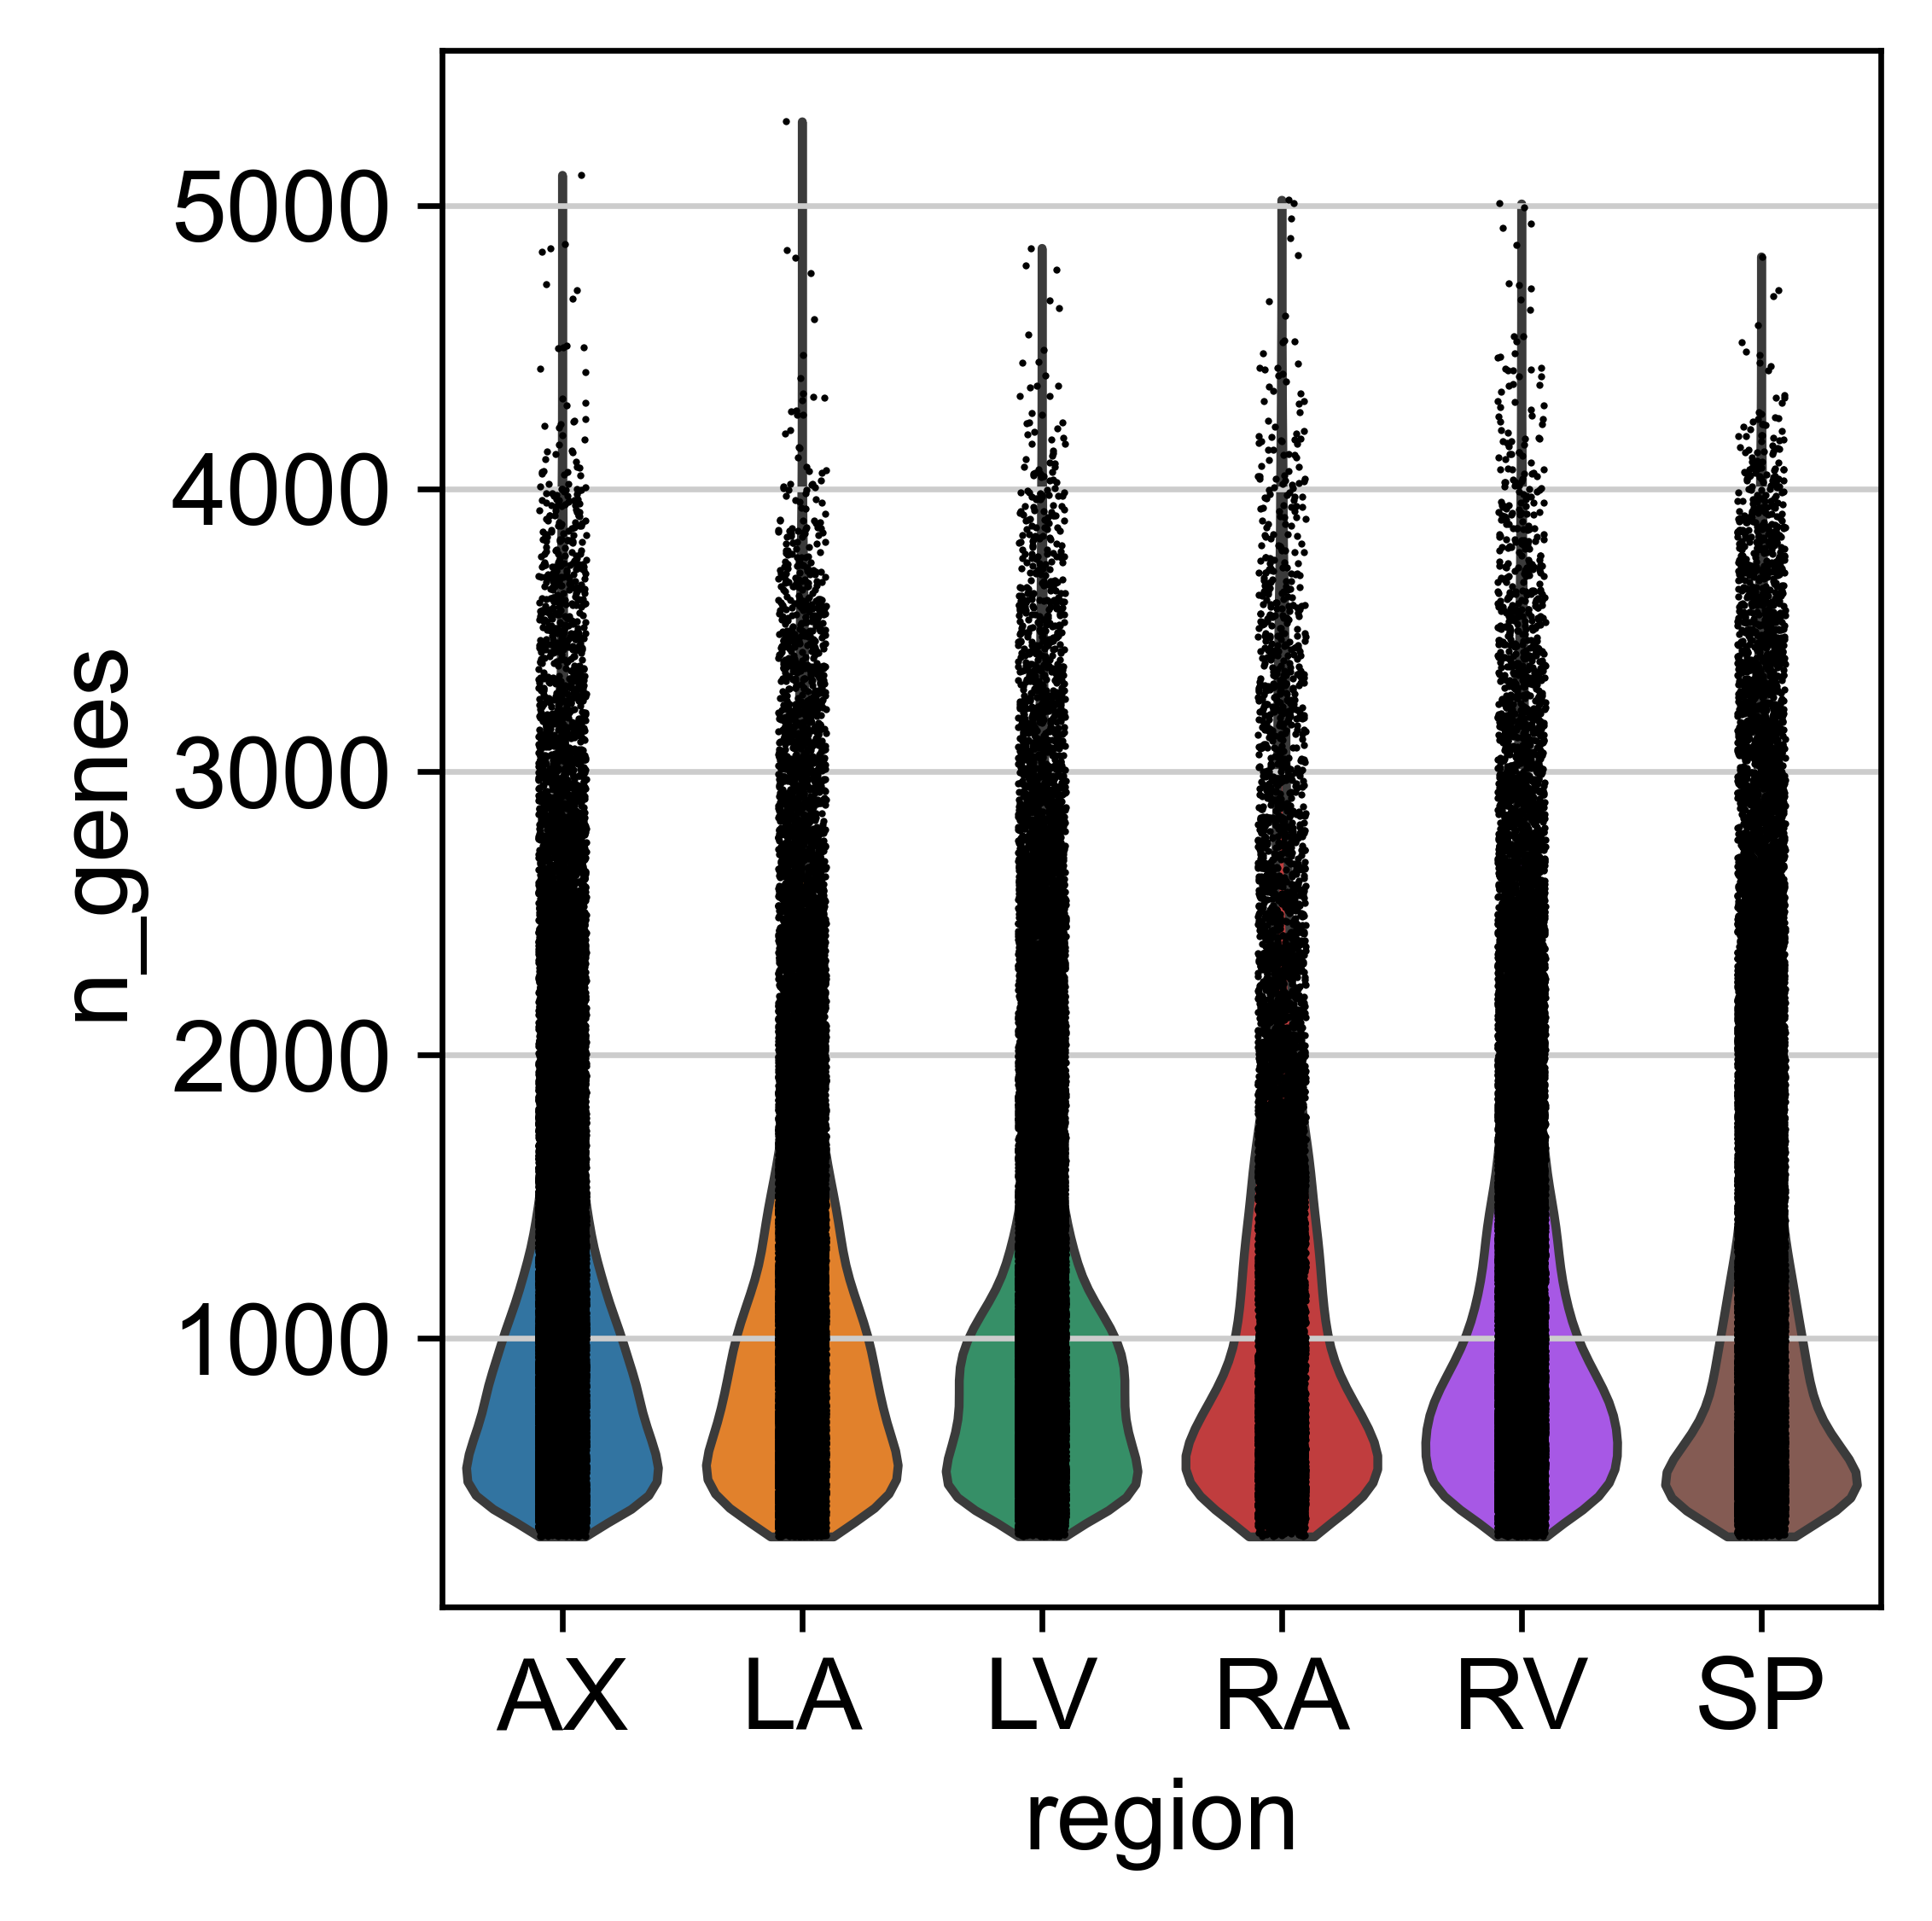

In [11]:
sc.pl.violin(vascular , groupby= 'region' , keys= 'n_genes')

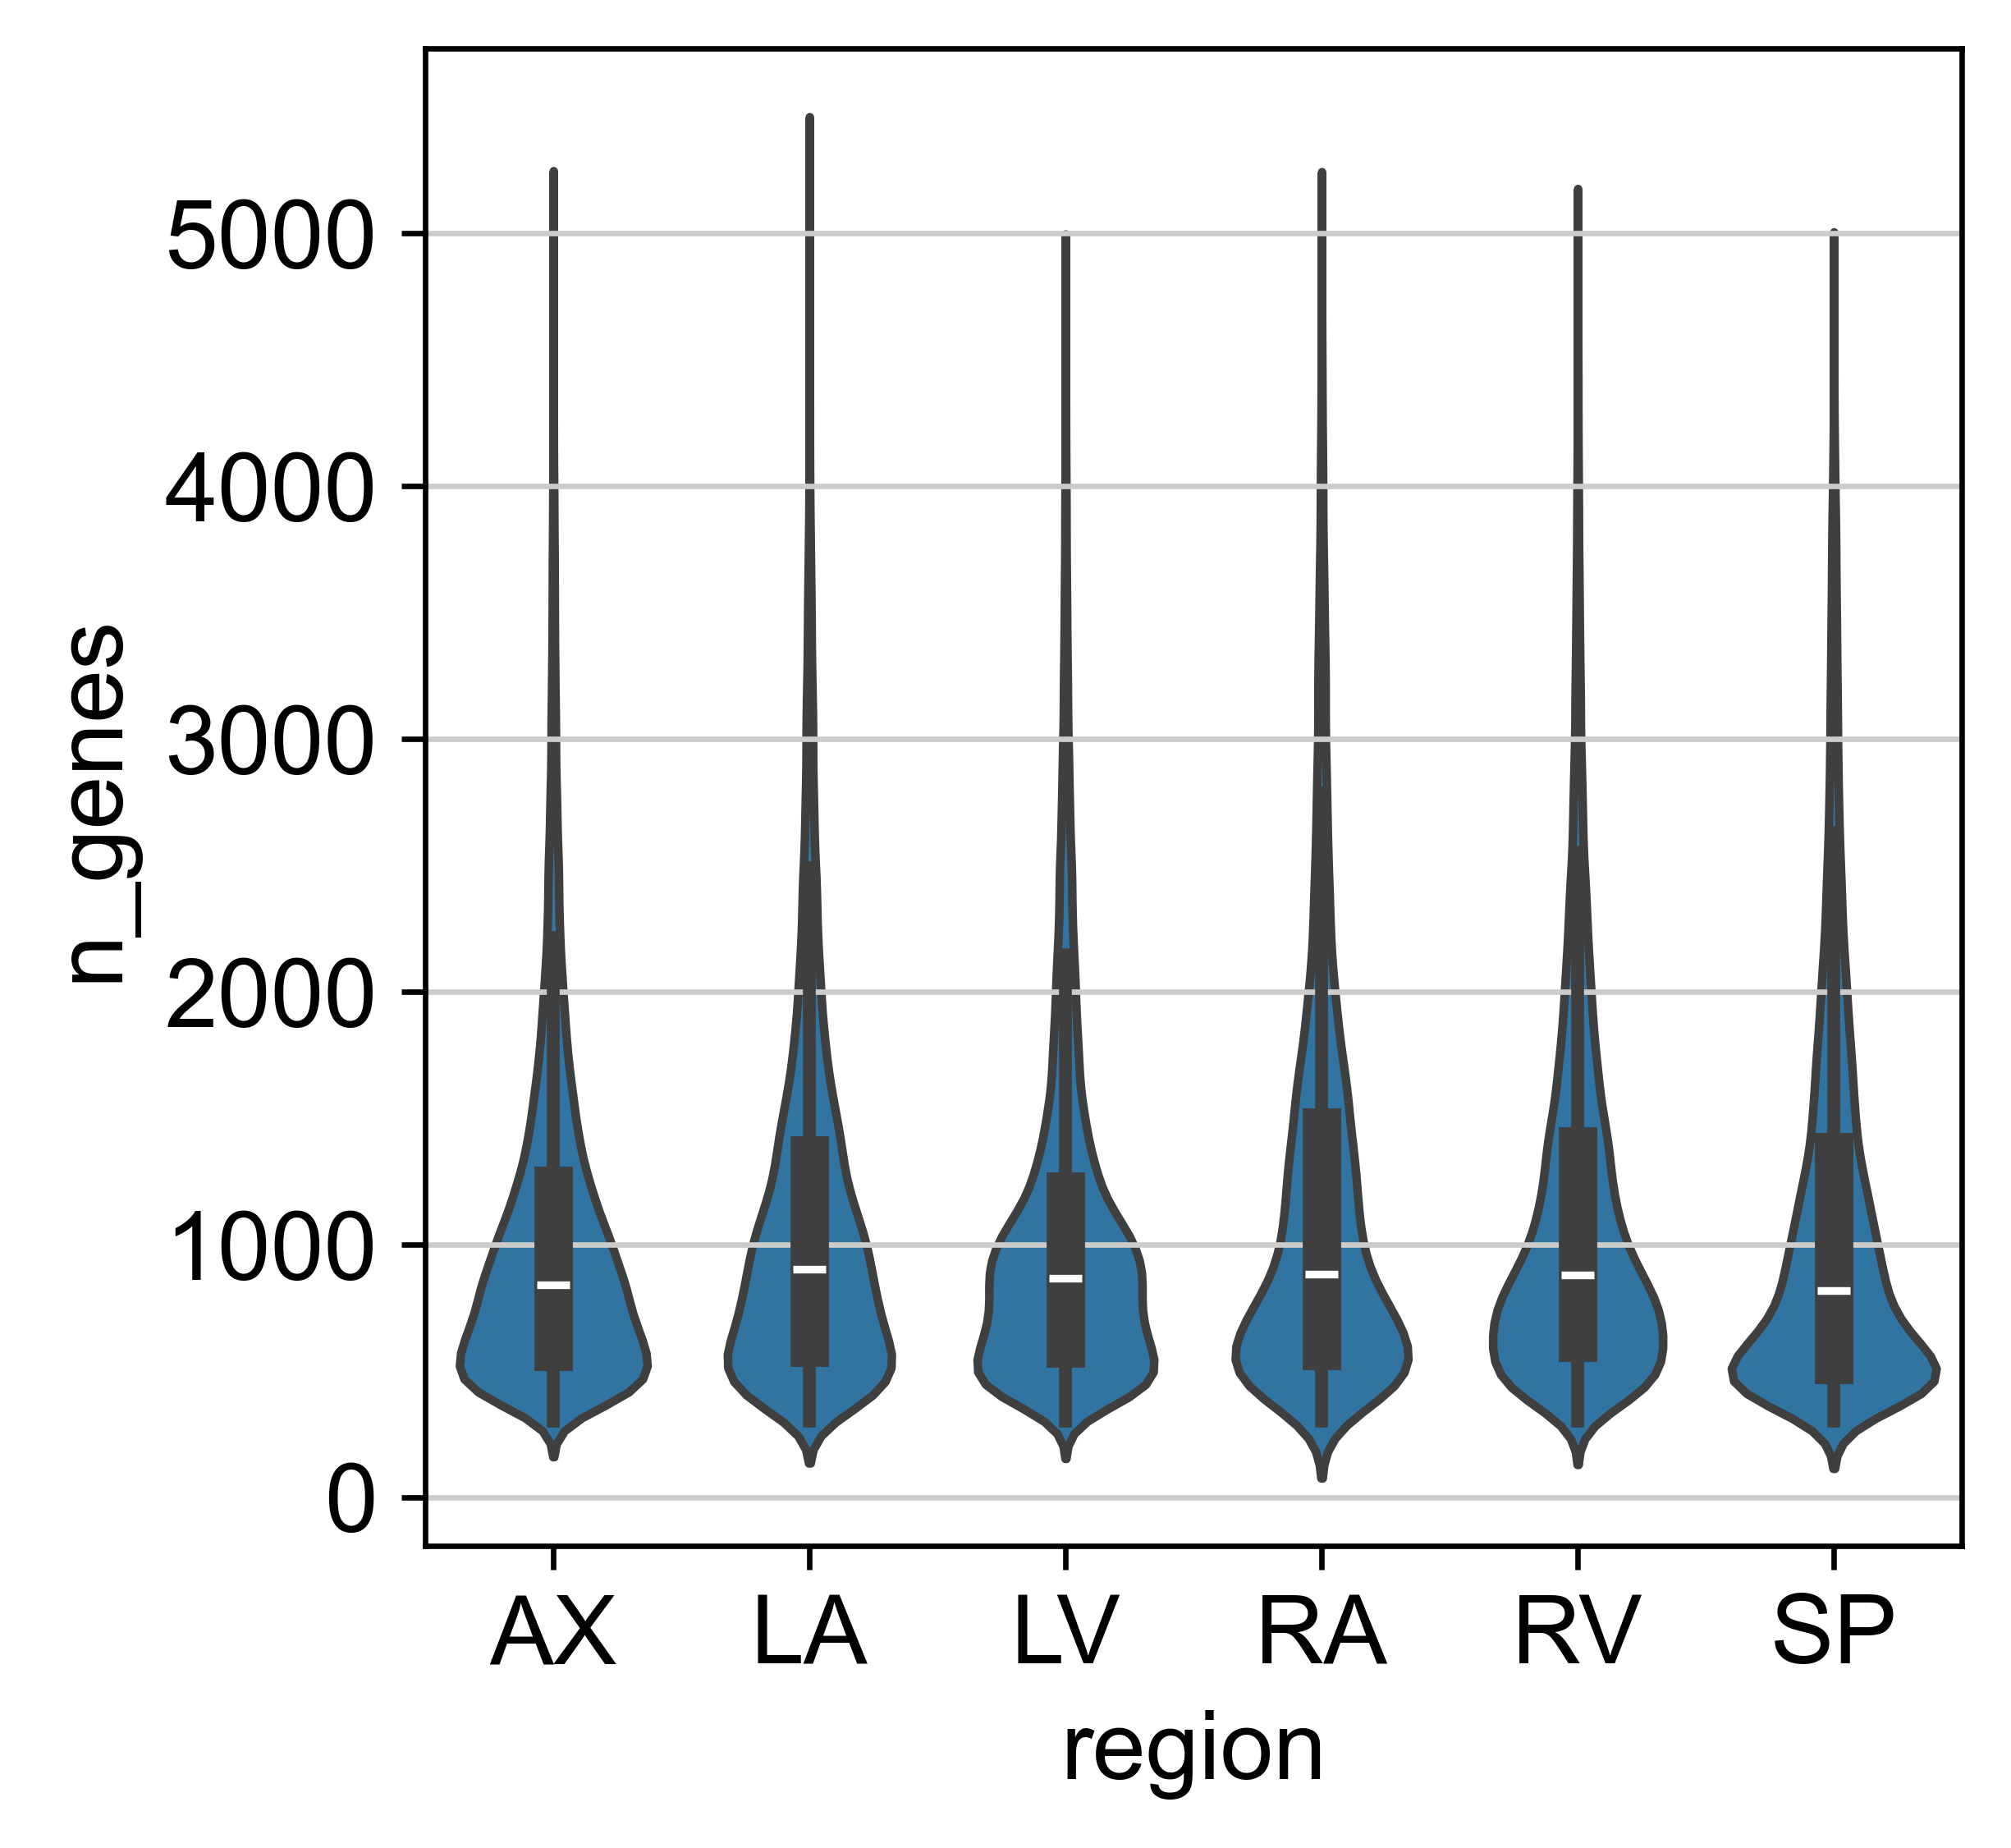

<Figure size 3000x1800 with 0 Axes>

In [12]:
sns.violinplot(x='region', y='n_genes', data=vascular.obs, fill= 'region')
plt.figure(figsize=(10, 6))
plt.show()

##### *Description of data analysed*

The violin plot clearly demonstrates us that similar range of genes are observed in all the regions. Though there are variations in median values, the range and representation is similar. 

LV represents more number of genes above 1000 compared to others according to the width of plot.

All regions have more number of genes in the range of 100-1000

##### *Description of violin plots*

**Violin Body**: The central part of the violin plot represents the probability density of the data.

**Box Plot**:
        Median (White line inside the box) Q2 ;
        Quartiles (the edges of the box) Q1,Q3 - Height of box represent Interquartile region (Q1-Q2-Q3) ;
        Outliers (points beyond the whiskers)

**Whiskers**: The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles

**Outliers**: Individual data points beyond the whiskers